Sean McNulty
Eduard Shokur
Courtney Duzet
Margaret Epstein
Anthony Marcozzi

# Gradient Descent

If you successfully completed the previous notebook, you'll now have a good understanding that we can view the log-likelihood function as a landscape.  Unfortunately, it's the rare problem for which that landscape actually exists in 2-dimensions like our own physical topography.  Indeed, for machine learning this landscape often has thousands or millions of dimensions.  This precludes the possibility of finding optimal solutions through grid searches.

The alternative to brute force is gradient descent.  Here we'll take the convention of trying to minimize a so-called *cost function*, which for our purposes is just -1 times the log-posterior we've been working with (for historical reasons, the machine learning literature tends to think of optimization problems in terms of minimizing a cost function, as opposed to maximizing a log-posterior, even though the two viewpoints are equivalen).  For the lobster problem, the cost function to minimize is 
$$
\mathcal{L}(\mathbf{w};\mathbf{X}_{obs},\mathbf{Y}_{obs}) = -\sum_{i=1}^m \left[Y_{obs,i} \ln \sigma(\Phi_i \mathbf{w}) + (1-Y_{obs,i}) \ln (1-\sigma(\Phi_i \mathbf{w}))\right] + \lambda \mathbf{w}^T \mathbf{w}. 
$$
The gradient of this function is 
$$
\nabla_\mathbf{w} \mathcal{L} = -\sum_{i=1}^m \left[ (Y_{obs,i} - \sigma(\Phi_i \mathbf{w})) \Phi_i\right] + \lambda\mathbf{w}^T. 
$$
Gradient descent is implemented by sequentially updating the model parameters as
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \nabla_{\mathbf{w}} \mathcal{L}.
$$
**Return to the lobster problem, and attempt to find the optimal value of $\mathbf{w}$ using gradient descent.  You'll have to select both a sensible initial guess for $\mathbf{w}$, as well as a value of $\eta$: too big, and it'll do some crazy things, too small and you won't get anywhere.  Because you've already solved this problem using grid search, you know the solution that you're trying to achieve.  Plot the trajectory of parameter values over the loss surface that you constructed for the brute force method (this is very helpful for debugging).**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('datasets/lobster_survive.dat',skiprows=1)
X,Y = data.T
X -= X.mean()
X /= X.std()

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def Phi(X, d=1):
    return_phi = np.ones((len(X),d+1))
    for i in range(1,d+1):
        return_phi[:,i] = np.power(X,i)
    return return_phi
phi = Phi(X)
def L_grad_func(Y,w,lamda=0):
    m = len(Y)
    return_sum = 0
    for i in range(m):
        return_sum += (Y[i] - sigmoid(phi[i,:]@w))*phi[i,:]
    return -return_sum+lamda*np.transpose(w)

In [35]:
tol = 1e-5
eta = 1e-2
current_tol = 100

#first guess
w0_0 = [-.5]
w1_0 = [.25]
while current_tol > tol:
    w_curr = [w0_0[-1],w1_0[-1]]
    w_new = w_curr - eta * L_grad_func(Y,w_curr)
    w0_0.append(w_new[0])
    w1_0.append(w_new[1])
    current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
    
#second guess
current_tol = 100
w0_1 = [.75]
w1_1 = [.25]
while current_tol > tol:
    w_curr = [w0_1[-1],w1_1[-1]]
    w_new = w_curr - eta * L_grad_func(Y,w_curr)
    w0_1.append(w_new[0])
    w1_1.append(w_new[1])
    current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
    
#third guess
current_tol = 100
w0_2 = [.75]
w1_2 = [1.75]
while current_tol > tol:
    w_curr = [w0_2[-1],w1_2[-1]]
    w_new = w_curr - eta * L_grad_func(Y,w_curr)
    w0_2.append(w_new[0])
    w1_2.append(w_new[1])
    current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)

#### Contour Plot

In [36]:
#Stuff from lab 5 for contour plot
def L(w,X,Y,lamda=0):
    #sum term
    phi = Phi(X)
    sum_total = 0
    for i in range(len(X)):
        first_term = Y[i]*np.log(sigmoid(phi[i,:]@w))
        second_term = (1-Y[i])*np.log(1-sigmoid(phi[i,:]@w))
        third_term = lamda * np.transpose(w)@w
        sum_total += first_term + second_term - third_term 
    return sum_total

num = 25
L_array = np.ones((25,25))
w0_vec = np.linspace(-1,1,num)
w1_vec = np.linspace(0,2,num)

for i in range(w0_vec.size):
    for j in range(w1_vec.size):
        L_array[i,j] = L([w0_vec[i],w1_vec[j]],X,Y)

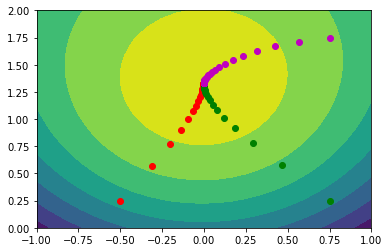

In [37]:
#plot convergences from guesses and contour map
plt.contourf(w0_vec,w1_vec,L_array.T)

plt.scatter(w0_0,w1_0,c='r')
plt.scatter(w0_1,w1_1,c='g')
plt.scatter(w0_2,w1_2,c='m')